In [ ]:
import hddm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
model_dir = '/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'
write_dir = '/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

In [ ]:
v_within_subj_obs=hddm.load(model_dir+'v_within_subj_observed_cleaned')
a_within_subj_obs=hddm.load(model_dir+'a_within_subj_observed_cleaned')
av_within_subj_obs=hddm.load(model_dir+'av_within_subj_observed_cleaned')

## Model fits

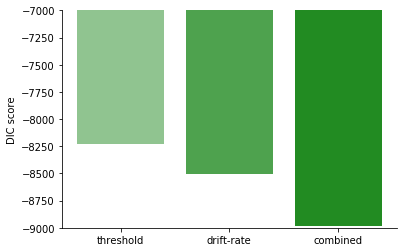

In [15]:
# plt.rcParams['figure.figsize'] = 10, 10
# plt.rcParams['axes.titlesize'] = 25
# plt.rcParams['axes.labelsize'] = 30
# plt.rcParams['xtick.labelsize'] = 30
# plt.rcParams['ytick.labelsize'] = 30

# names = [r'$a+v$',r'$v$',r'$a$']
# colors = ['red', 'green', 'blue']
names = [ 'threshold', 'drift-rate','combined']
dics = [a_within_subj_obs.dic,v_within_subj_obs.dic, av_within_subj_obs.dic]
bars =plt.bar(names,dics, color='forestgreen')
plt.ylim(-9000,-7000)
# plt.yticks([])

plt.ylabel('DIC score')
bars[0].set_alpha(.5)
bars[1].set_alpha(.8)
bars[2].set_alpha(1)
# plt.axvline(av_within_subj_obs.dic, color='k', alpha=0.5, linestyle = '--')
sns.despine(top=True)
plt.savefig(write_dir+'observed_dics.pdf',  bbox_inches="tight")

In [26]:
dics[0] - dics[2]

751.91830208063948

In [5]:
from cycler import cycler

In [ ]:
plt.rc('axes', prop_cycle=(cycler('color', ['b', 'r', 'purple','forestgreen'] )))

In [7]:
v_hc, v_hv, v_lc, v_lv  = av_within_subj_obs.nodes_db.ix[['v_C(stim)[hc]', 'v_C(stim)[hv]', 'v_C(stim)[lc]', 'v_C(stim)[lv]'], 'node']
v_alone_hc, v_alone_hv, v_alone_lc, v_alone_lv  = v_within_subj_obs.nodes_db.ix[['v_C(stim)[hc]', 'v_C(stim)[hv]', 'v_C(stim)[lc]', 'v_C(stim)[lv]'], 'node']

/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [8]:
a_hc, a_hv, a_lc, a_lv  = av_within_subj_obs.nodes_db.ix[['a_C(stim)[hc]', 'a_C(stim)[hv]', 'a_C(stim)[lc]', 'a_C(stim)[lv]'], 'node']
a_alone_hc, a_alone_hv, a_alone_lc, a_alone_lv  = a_within_subj_obs.nodes_db.ix[['a_C(stim)[hc]', 'a_C(stim)[hv]', 'a_C(stim)[lc]', 'a_C(stim)[lv]'], 'node']

/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [ ]:
threshold_alone_fig = hddm.analyze.plot_posterior_nodes([a_alone_hc, a_alone_hv, a_alone_lc, a_alone_lv])
plt.title('Threshold alone')
plt.legend()

In [ ]:
drift_alone_fig = hddm.analyze.plot_posterior_nodes([v_alone_hc, v_alone_hv, v_alone_lc, v_alone_lv])
plt.title('Drift alone')
plt.legend()


## Posterior probability of drift-rate for all conditions 

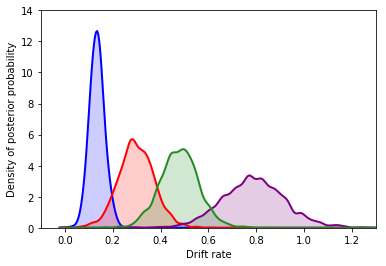

In [12]:
plt.rc('axes', prop_cycle=(cycler('color', ['b', 'r', 'purple','forestgreen'] )))
drift_fig = hddm.analyze.plot_posterior_nodes([v_hc, v_hv, v_lc, v_lv])
plt.xlabel('Drift rate')
plt.ylabel('Density of posterior probability')
# plt.legend()
# plt.title('All Groups: Group mean posteriors of within-subject bound effects.')
# plt.savefig('hddm_demo_fig_07.pdf')
# plt.title('Combined model')

plt.ylim(0,14)
plt.xlim(-.1,1.3)
plt.savefig(write_dir+'drift_all.pdf')

## Posterior probability of threshold for all conditions 

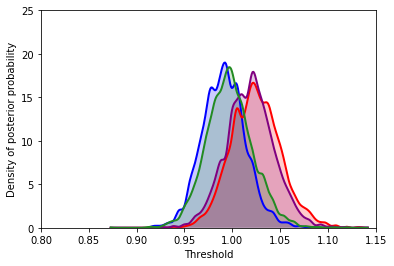

In [14]:
plt.rc('axes', prop_cycle=(cycler('color', ['b', 'r', 'purple','forestgreen'] )))
bound_fig = hddm.analyze.plot_posterior_nodes([a_hc, a_hv, a_lc, a_lv])
plt.xlabel('Threshold')a
plt.ylabel('Density of posterior probability')
# plt.title('Combined model')
# plt.legend()
# plt.title('All Groups: Group mean posteriors of within-subject bound effects.')
# plt.savefig('hddm_demo_fig_07.pdf')
plt.ylim(0,25)
plt.xlim(.80,1.15)

plt.savefig(write_dir+'thrsh_all.pdf')

## Conflict drift-rate contrasts 

In [ ]:
drift_fig = hddm.analyze.plot_posterior_nodes([v_hc, v_lc])
plt.xlabel('Drift rate')
plt.ylabel('Density of posterior probability')
plt.legend()
plt.title('Combined model')

# plt.title('All Groups: Group mean posteriors of within-subject bound effects.')
# plt.savefig('hddm_demo_fig_07.pdf')
plt.ylim(0,14)
plt.savefig(write_dir+'drift_conflict.pdf')

## Volatility threshold contrasts 

In [ ]:
 drift_fig = hddm.analyze.plot_posterior_nodes([a_hv, a_lv])
plt.xlabel('Threshold')
plt.ylabel('Density of posterior probability')
plt.legend()
plt.title('Combined model')

# plt.title('All Groups: Group mean posteriors of within-subject bound effects.')
# plt.savefig('hddm_demo_fig_07.pdf')
# plt.ylim(0,12)
plt.savefig(write_dir+'thresh_vol.pdf')

## Hypothesis testing 

Positive -- evidence for hyp. & null-ish probabilities 

In [27]:
print("P(LC_drift > HC_drift) = ", (v_lc.trace() > v_hc.trace()).mean())
print("P(LC_drift < HC_drift) = ", (v_lc.trace() < v_hc.trace()).mean())

P(LC_drift > HC_drift) =  1.0
P(LC_drift < HC_drift) =  0.0


In [28]:
print("P(HV_threshold > LV_threshold) = ", (a_hv.trace() > a_lv.trace()).mean())
print("P(HV_threshold < LV_threshold) = ", (a_hv.trace() < a_lv.trace()).mean())

P(HV_threshold > LV_threshold) =  0.776875
P(HV_threshold < LV_threshold) =  0.223125


In [31]:
print("P(LC_threshold > HC_threshold) = ", (a_lc.trace() > a_hc.trace()).mean())
`

P(LC_threshold > HC_threshold) =  0.793125


In [34]:
print("P(HC_drift > HV_drift) = ", (v_hc.trace() > v_hv.trace()).mean())


P(HC_drift > HV_drift) =  0.019375


## Raw time series

### Volatility

In [ ]:
from IPython.display import Image
fig_path = '/Users/67981492/Dropbox/volatileValues/spydr_scripts/m_plots'

In [ ]:
Image(fig_path+"/vol_acc_both_raw.png")

In [ ]:
Image(fig_path+"/vol_acc_both_clean.png")

In [ ]:
Image(fig_path+"/vol_rt_both_raw.png")

In [ ]:
Image(fig_path+"/vol_rt_both_clean.png")

### Conflict

In [ ]:
Image(fig_path+"/conf_acc_both_raw.png")

In [ ]:
Image(fig_path+"/conf_acc_both_clean.png")

In [ ]:
Image(fig_path+"/conf_rt_both_raw.png")

In [ ]:
 Image(fig_path+"/conf_rt_both_clean.png")